<a href="https://colab.research.google.com/github/pjjongho/Colab_AD/blob/main/Web%20Site%20Traffic%20Anomaly%20Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[Chapter 15]**  
**┗ 사이트 트래픽 이상 탐지**
---
> **목차(Context)**

* 문제상황 및 데이터 살펴보기
* 문제해결 프로세스 정의
* 🥉Session 1 - 「Data 전처리 및 EDA」
* 🥈Session 2 - 「국가별 트래픽 분석」
* 🥇Session 3 - 「이상 탐지 모델링」

In [ ]:
# ▶ Warnings 제거
import warnings
warnings.filterwarnings('ignore')


from google.colab import drive
drive.mount('/content/drive')


import os
os.chdir("/content/drive/MyDrive/")
os.getcwd()

Mounted at /content/drive


'/content/drive/MyDrive/Colab Notebooks/00.Fast_campus/02.Anomaly_detection/03.Part3/Chapter15'

## **문제상황 및 데이터 살펴보기**
---
> **시나리오** 📊

```
A사는 글로벌 웹툰 플랫폼을 운영하고 있는 회사다. 회사가 글로벌로 성장하고 있는 만큼 웹툰 불법복제로 인해 막대한 피해를 입고 있는 상황이다.  
따라서 불법복제 사이트의 트래픽을 감지하고 해당 트래픽이 급 상승하게 된다면, 해당 사이트를 점검하고 불법 복제를 차단하고자 한다.

```  

> **데이터 살펴보기**

* Page별 트래픽 정보
* 데이터 명세 ⬇

|Column|Description|
|:---|:---|
|Page|Page명|
|2015-07-01~|일자|





In [ ]:
# ▶ pd.set option
import pandas as pd
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

# ▶ Data read
df = pd.read_csv("chapter15_df.csv")
df.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-11,2015-07-12,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-18,2015-07-19,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-25,2015-07-26,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-01,2015-08-02,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-08,2015-08-09,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-15,2015-08-16,2015-08-17,2015-08-18,...,2016-11-12,2016-11-13,2016-11-14,2016-11-15,2016-11-16,2016-11-17,2016-11-18,2016-11-19,2016-11-20,2016-11-21,2016-11-22,2016-11-23,2016-11-24,2016-11-25,2016-11-26,2016-11-27,2016-11-28,2016-11-29,2016-11-30,2016-12-01,2016-12-02,2016-12-03,2016-12-04,2016-12-05,2016-12-06,2016-12-07,2016-12-08,2016-12-09,2016-12-10,2016-12-11,2016-12-12,2016-12-13,2016-12-14,2016-12-15,2016-12-16,2016-12-17,2016-12-18,2016-12-19,2016-12-20,2016-12-21,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,24.0,19.0,10.0,14.0,15.0,8.0,16.0,8.0,8.0,16.0,7.0,11.0,10.0,20.0,18.0,15.0,14.0,49.0,10.0,16.0,18.0,8.0,5.0,9.0,7.0,13.0,9.0,7.0,4.0,11.0,10.0,5.0,9.0,9.0,9.0,9.0,13.0,4.0,15.0,25.0,...,13.0,8.0,15.0,14.0,12.0,6.0,11.0,10.0,42.0,21.0,24.0,14.0,11.0,204.0,14.0,45.0,33.0,28.0,18.0,14.0,47.0,15.0,14.0,18.0,20.0,14.0,16.0,14.0,20.0,60.0,22.0,15.0,17.0,19.0,18.0,21.0,21.0,47.0,65.0,17.0,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,4.0,41.0,65.0,57.0,38.0,20.0,62.0,44.0,15.0,10.0,47.0,24.0,17.0,22.0,9.0,39.0,13.0,11.0,12.0,21.0,19.0,9.0,15.0,33.0,8.0,8.0,7.0,13.0,2.0,23.0,12.0,27.0,27.0,36.0,23.0,58.0,80.0,60.0,69.0,42.0,...,12.0,11.0,14.0,28.0,23.0,20.0,9.0,12.0,11.0,14.0,14.0,15.0,15.0,11.0,20.0,13.0,19.0,621.0,57.0,17.0,23.0,19.0,21.0,47.0,28.0,22.0,22.0,65.0,27.0,17.0,17.0,13.0,9.0,18.0,22.0,17.0,15.0,22.0,23.0,19.0,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,4.0,1.0,1.0,1.0,6.0,8.0,6.0,4.0,5.0,1.0,2.0,3.0,8.0,8.0,6.0,6.0,2.0,2.0,3.0,2.0,4.0,3.0,3.0,5.0,3.0,5.0,4.0,2.0,5.0,1.0,4.0,5.0,0.0,0.0,7.0,3.0,5.0,1.0,6.0,2.0,...,6.0,4.0,2.0,4.0,6.0,5.0,4.0,4.0,3.0,3.0,9.0,3.0,5.0,4.0,0.0,1.0,4.0,5.0,8.0,8.0,1.0,1.0,2.0,5.0,3.0,3.0,3.0,7.0,3.0,9.0,8.0,3.0,210.0,5.0,4.0,6.0,2.0,2.0,4.0,3.0,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,16.0,16.0,11.0,23.0,145.0,14.0,17.0,85.0,4.0,30.0,22.0,9.0,10.0,11.0,7.0,7.0,11.0,9.0,11.0,44.0,8.0,14.0,19.0,10.0,17.0,17.0,10.0,7.0,10.0,1.0,8.0,27.0,19.0,16.0,2.0,84.0,22.0,14.0,47.0,25.0,...,38.0,13.0,14.0,17.0,26.0,14.0,10.0,9.0,23.0,15.0,7.0,10.0,7.0,10.0,14.0,17.0,11.0,9.0,11.0,5.0,10.0,8.0,17.0,13.0,23.0,40.0,16.0,17.0,41.0,17.0,8.0,9.0,18.0,12.0,12.0,18.0,13.0,18.0,23.0,10.0,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.0,11.0,8.0,6.0,10.0,14.0,6.0,9.0,6.0,16.0,14.0,13.0,15.0,14.0,16.0,9.0,178.0,64.0,12.0,10.0,11.0,6.0,8.0,7.0,9.0,8.0,5.0,11.0,8.0,4.0,15.0,5.0,8.0,8.0,6.0,7.0,15.0,4.0,11.0,7.0,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0



## **문제해결 프로세스 정의**
---
> **문제정의**

```
▶ 웹툰 불법복제 증가
▶ 웹툰 불법복제로 인한 피해 금액 발생
```  

> **기대효과**

```
▶ 불법복제 사전 차단으로 피해 방지
▶ 작가 및 컨텐츠 보호
```

> **해결방안**

```
▶ 불법 복제 사이트 트래픽 이상 탐지
▶ Session 1 🥉
 - Data 전처리 및 EDA
▶ Session 2 🥈
 - 국가별 트래픽 분석
▶ Session 3 🥇
 - 이상 탐지 모델링 수행
```

> **성과측정**  

```
▶ 모델 활용 전/후 웹툰 불법복제 건 수 비교
```

> **현업적용**  

```
▶ 불법 복제 사이트 트래픽 수집 체계 구축
▶ 불법 복제 사이트 이상 탐지 시 점검 및 방어활동 전개
```

> **주요 코드 미리 살펴보기**  

```
▶ Session 1 → df['Page'].nunique(),  df_0.transpose()
▶ Session 2 → re.search(), .map(), Counter()
▶ Session 3 → np.int64(df_idx['date']), detect_ts()
```

## **🥉Session 1**  
**┗ Data 전처리 및 EDA**  
---

### · Data 전처리  
---
* 수집된 데이터의 기본 정보들을 확인  

  (1) Data shape(형태) 확인

  (2) Data type 확인

  (3) Null값 확인 (※ 빈 값의 Data)

  (4) Outlier 확인 (※ 정상적인 범주를 벗어난 Data)  

In [ ]:
# ▶ Data 형태 확인
# ▶ 145063 row, 551 col로 구성됨
print('df :', df.shape)

df : (145063, 551)


In [ ]:
# ▶ Data type 확인
df.iloc[:,0:10].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Page        145063 non-null  object 
 1   2015-07-01  124323 non-null  float64
 2   2015-07-02  124247 non-null  float64
 3   2015-07-03  124519 non-null  float64
 4   2015-07-04  124409 non-null  float64
 5   2015-07-05  124404 non-null  float64
 6   2015-07-06  124580 non-null  float64
 7   2015-07-07  124399 non-null  float64
 8   2015-07-08  124769 non-null  float64
 9   2015-07-09  124819 non-null  float64
dtypes: float64(9), object(1)
memory usage: 11.1+ MB


In [ ]:
# ▶ Null 값 확인
print(df.isnull().sum())

Page              0
2015-07-01    20740
2015-07-02    20816
2015-07-03    20544
2015-07-04    20654
              ...  
2016-12-27     3701
2016-12-28     3822
2016-12-29     3826
2016-12-30     3635
2016-12-31     3465
Length: 551, dtype: int64


In [ ]:
# ▶ NUll 값 처리
df = df.fillna(0)
print(df.isnull().sum().sum())

0


In [ ]:
# ▶ Outlier 확인
df.describe()

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-11,2015-07-12,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-18,2015-07-19,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-25,2015-07-26,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-01,2015-08-02,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-08,2015-08-09,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-15,2015-08-16,2015-08-17,2015-08-18,2015-08-19,...,2016-11-12,2016-11-13,2016-11-14,2016-11-15,2016-11-16,2016-11-17,2016-11-18,2016-11-19,2016-11-20,2016-11-21,2016-11-22,2016-11-23,2016-11-24,2016-11-25,2016-11-26,2016-11-27,2016-11-28,2016-11-29,2016-11-30,2016-12-01,2016-12-02,2016-12-03,2016-12-04,2016-12-05,2016-12-06,2016-12-07,2016-12-08,2016-12-09,2016-12-10,2016-12-11,2016-12-12,2016-12-13,2016-12-14,2016-12-15,2016-12-16,2016-12-17,2016-12-18,2016-12-19,2016-12-20,2016-12-21,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
count,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,...,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05,1.450630e+05
mean,1.024882e+03,1.031234e+03,9.731234e+02,1.003791e+03,1.044342e+03,1.108086e+03,1.062624e+03,1.026181e+03,1.030808e+03,1.022828e+03,1.001716e+03,1.113144e+03,1.117408e+03,1.117105e+03,1.047746e+03,1.060081e+03,1.044334e+03,1.005197e+03,1.051491e+03,1.085423e+03,1.035219e+03,1.030876e+03,9.933826e+02,9.401462e+02,9.234025e+02,9.914153e+02,1.023080e+03,1.007146e+03,1.114286e+03,9.419964e+02,9.078609e+02,8.767939e+02,9.590281e+02,9.472370e+02,1.044041e+03,1.036666e+03,1.045485e+03,1.044501e+03,1.001319e+03,1.049472e+03,1.034287e+03,1.053420e+03,1.061303e+03,1.057916e+03,1.035747e+03,1.026828e+03,1.091073e+03,1.108965e+03,1.089828e+03,1.043396e+03,...,1.491626e+03,1.625663e+03,1.650061e+03,1.514151e+03,1.473522e+03,1.419788e+03,1.354377e+03,1.358959e+03,1.436025e+03,1.483431e+03,1.483015e+03,1.400502e+03,1.333139e+03,1.286724e+03,1.433758e+03,1.535686e+03,1.420652e+03,1.490117e+03,1.359531e+03,1.350132e+03,1.309802e+03,1.403555e+03,1.480397e+03,1.469607e+03,1.453047e+03,1.403696e+03,1.377607e+03,1.330048e+03,1.326455e+03,1.404163e+03,1.422321e+03,1.356702e+03,1.415250e+03,1.300732e+03,1.234461e+03,1.249107e+03,1.437414e+03,1.522471e+03,1.467871e+03,1.386430e+03,1.357067e+03,1.343449e+03,1.362474e+03,1.484413e+03,1.634242e+03,1.635483e+03,1.590915e+03,1.639885e+03,1.431160e+03,1.442972e+03
std,6.735340e+04,6.868551e+04,6.449417e+04,6.720994e+04,6.834087e+04,7.464303e+04,7.016081e+04,6.325117e+04,6.632223e+04,6.689720e+04,6.492833e+04,6.682147e+04,6.819203e+04,6.540421e+04,6.491571e+04,6.521803e+04,6.296504e+04,6.087859e+04,6.220447e+04,6.754173e+04,6.543861e+04

In [ ]:
pd.Series(pd.DataFrame(df.describe()).loc['min', :]<0).value_counts()

False    550
Name: min, dtype: int64

### · Data EDA
---
* 데이터 특성 파악을 위한 초기 탐색

In [ ]:
df.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-11,2015-07-12,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-18,2015-07-19,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-25,2015-07-26,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-01,2015-08-02,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-08,2015-08-09,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-15,2015-08-16,2015-08-17,2015-08-18,...,2016-11-12,2016-11-13,2016-11-14,2016-11-15,2016-11-16,2016-11-17,2016-11-18,2016-11-19,2016-11-20,2016-11-21,2016-11-22,2016-11-23,2016-11-24,2016-11-25,2016-11-26,2016-11-27,2016-11-28,2016-11-29,2016-11-30,2016-12-01,2016-12-02,2016-12-03,2016-12-04,2016-12-05,2016-12-06,2016-12-07,2016-12-08,2016-12-09,2016-12-10,2016-12-11,2016-12-12,2016-12-13,2016-12-14,2016-12-15,2016-12-16,2016-12-17,2016-12-18,2016-12-19,2016-12-20,2016-12-21,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,24.0,19.0,10.0,14.0,15.0,8.0,16.0,8.0,8.0,16.0,7.0,11.0,10.0,20.0,18.0,15.0,14.0,49.0,10.0,16.0,18.0,8.0,5.0,9.0,7.0,13.0,9.0,7.0,4.0,11.0,10.0,5.0,9.0,9.0,9.0,9.0,13.0,4.0,15.0,25.0,...,13.0,8.0,15.0,14.0,12.0,6.0,11.0,10.0,42.0,21.0,24.0,14.0,11.0,204.0,14.0,45.0,33.0,28.0,18.0,14.0,47.0,15.0,14.0,18.0,20.0,14.0,16.0,14.0,20.0,60.0,22.0,15.0,17.0,19.0,18.0,21.0,21.0,47.0,65.0,17.0,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,4.0,41.0,65.0,57.0,38.0,20.0,62.0,44.0,15.0,10.0,47.0,24.0,17.0,22.0,9.0,39.0,13.0,11.0,12.0,21.0,19.0,9.0,15.0,33.0,8.0,8.0,7.0,13.0,2.0,23.0,12.0,27.0,27.0,36.0,23.0,58.0,80.0,60.0,69.0,42.0,...,12.0,11.0,14.0,28.0,23.0,20.0,9.0,12.0,11.0,14.0,14.0,15.0,15.0,11.0,20.0,13.0,19.0,621.0,57.0,17.0,23.0,19.0,21.0,47.0,28.0,22.0,22.0,65.0,27.0,17.0,17.0,13.0,9.0,18.0,22.0,17.0,15.0,22.0,23.0,19.0,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,4.0,1.0,1.0,1.0,6.0,8.0,6.0,4.0,5.0,1.0,2.0,3.0,8.0,8.0,6.0,6.0,2.0,2.0,3.0,2.0,4.0,3.0,3.0,5.0,3.0,5.0,4.0,2.0,5.0,1.0,4.0,5.0,0.0,0.0,7.0,3.0,5.0,1.0,6.0,2.0,...,6.0,4.0,2.0,4.0,6.0,5.0,4.0,4.0,3.0,3.0,9.0,3.0,5.0,4.0,0.0,1.0,4.0,5.0,8.0,8.0,1.0,1.0,2.0,5.0,3.0,3.0,3.0,7.0,3.0,9.0,8.0,3.0,210.0,5.0,4.0,6.0,2.0,2.0,4.0,3.0,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,16.0,16.0,11.0,23.0,145.0,14.0,17.0,85.0,4.0,30.0,22.0,9.0,10.0,11.0,7.0,7.0,11.0,9.0,11.0,44.0,8.0,14.0,19.0,10.0,17.0,17.0,10.0,7.0,10.0,1.0,8.0,27.0,19.0,16.0,2.0,84.0,22.0,14.0,47.0,25.0,...,38.0,13.0,14.0,17.0,26.0,14.0,10.0,9.0,23.0,15.0,7.0,10.0,7.0,10.0,14.0,17.0,11.0,9.0,11.0,5.0,10.0,8.0,17.0,13.0,23.0,40.0,16.0,17.0,41.0,17.0,8.0,9.0,18.0,12.0,12.0,18.0,13.0,18.0,23.0,10.0,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,13.0,11.0,8.0,6.0,10.0,14.0,6.0,9.0,6.0,16.0,14.0,13.0,15.0,14.0,16.0,9.0,178.0,64.0,12.0,10.0,11.0,6.0,8.0,7.0,9.0,8.0,5.0,11.0,8.0,4.0,15.0,5.0,8.0,8.0,6.0,7.0,15.0,4.0,11.0,7.0,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [ ]:
# ▶ 데이터 적재 기간
# ▶ '2015-07-01' ~ '2016-12-31'
df.columns

Index(['Page', '2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04',
       '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09',
       ...
       '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
       '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30', '2016-12-31'],
      dtype='object', length=551)

In [ ]:
# ▶ 페이지  수
df['Page'].nunique()

145063

In [ ]:
# ▶ Page 1개 파악하기
df_0 = df.iloc[0,1:]
df_0 = df_0.transpose()
df_0

2015-07-01    18.0
2015-07-02    11.0
2015-07-03     5.0
2015-07-04    13.0
2015-07-05    14.0
              ... 
2016-12-27    20.0
2016-12-28    22.0
2016-12-29    19.0
2016-12-30    18.0
2016-12-31    20.0
Name: 0, Length: 550, dtype: object

In [ ]:
df_0.index = pd.to_datetime(df_0.index)
df_0.head()

2015-07-01    18.0
2015-07-02    11.0
2015-07-03     5.0
2015-07-04    13.0
2015-07-05    14.0
Name: 0, dtype: object

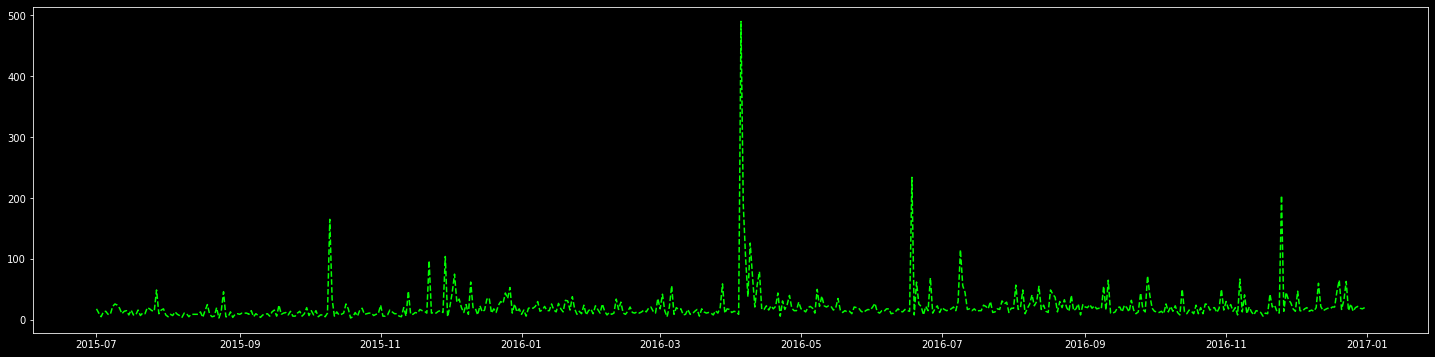

In [ ]:
# ▶ '2NE1_zh.wikipedia.org_all-access_spider'
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['dark_background'])

plt.plot(df_0, linestyle='--', color='lime');
plt.gcf().set_size_inches(25, 6)

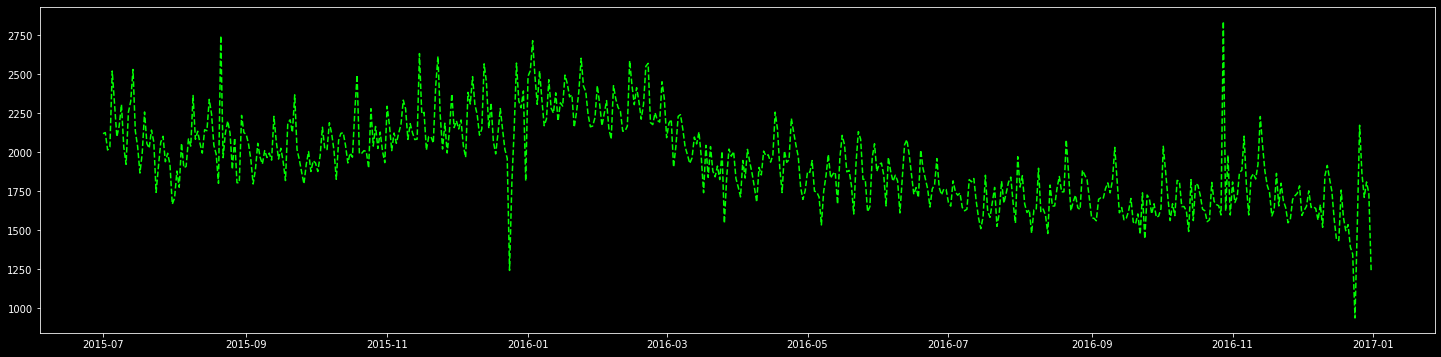

In [ ]:
# ▶ 2번째 Page
df_1 = df.iloc[140000,1:]
df_1 = df_1.transpose()
df_1.index = pd.to_datetime(df_1.index)

plt.plot(df_1, linestyle='--', color='lime');
plt.gcf().set_size_inches(25, 6)

## **🥈Session 2**  
**┗ 국가 별 트래픽 분석**  
---

### · Page 국가코드 추출
---

In [ ]:
df.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-11,2015-07-12,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-18,2015-07-19,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-25,2015-07-26,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-01,2015-08-02,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-08,2015-08-09,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-15,2015-08-16,2015-08-17,2015-08-18,...,2016-11-12,2016-11-13,2016-11-14,2016-11-15,2016-11-16,2016-11-17,2016-11-18,2016-11-19,2016-11-20,2016-11-21,2016-11-22,2016-11-23,2016-11-24,2016-11-25,2016-11-26,2016-11-27,2016-11-28,2016-11-29,2016-11-30,2016-12-01,2016-12-02,2016-12-03,2016-12-04,2016-12-05,2016-12-06,2016-12-07,2016-12-08,2016-12-09,2016-12-10,2016-12-11,2016-12-12,2016-12-13,2016-12-14,2016-12-15,2016-12-16,2016-12-17,2016-12-18,2016-12-19,2016-12-20,2016-12-21,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,24.0,19.0,10.0,14.0,15.0,8.0,16.0,8.0,8.0,16.0,7.0,11.0,10.0,20.0,18.0,15.0,14.0,49.0,10.0,16.0,18.0,8.0,5.0,9.0,7.0,13.0,9.0,7.0,4.0,11.0,10.0,5.0,9.0,9.0,9.0,9.0,13.0,4.0,15.0,25.0,...,13.0,8.0,15.0,14.0,12.0,6.0,11.0,10.0,42.0,21.0,24.0,14.0,11.0,204.0,14.0,45.0,33.0,28.0,18.0,14.0,47.0,15.0,14.0,18.0,20.0,14.0,16.0,14.0,20.0,60.0,22.0,15.0,17.0,19.0,18.0,21.0,21.0,47.0,65.0,17.0,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,4.0,41.0,65.0,57.0,38.0,20.0,62.0,44.0,15.0,10.0,47.0,24.0,17.0,22.0,9.0,39.0,13.0,11.0,12.0,21.0,19.0,9.0,15.0,33.0,8.0,8.0,7.0,13.0,2.0,23.0,12.0,27.0,27.0,36.0,23.0,58.0,80.0,60.0,69.0,42.0,...,12.0,11.0,14.0,28.0,23.0,20.0,9.0,12.0,11.0,14.0,14.0,15.0,15.0,11.0,20.0,13.0,19.0,621.0,57.0,17.0,23.0,19.0,21.0,47.0,28.0,22.0,22.0,65.0,27.0,17.0,17.0,13.0,9.0,18.0,22.0,17.0,15.0,22.0,23.0,19.0,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,4.0,1.0,1.0,1.0,6.0,8.0,6.0,4.0,5.0,1.0,2.0,3.0,8.0,8.0,6.0,6.0,2.0,2.0,3.0,2.0,4.0,3.0,3.0,5.0,3.0,5.0,4.0,2.0,5.0,1.0,4.0,5.0,0.0,0.0,7.0,3.0,5.0,1.0,6.0,2.0,...,6.0,4.0,2.0,4.0,6.0,5.0,4.0,4.0,3.0,3.0,9.0,3.0,5.0,4.0,0.0,1.0,4.0,5.0,8.0,8.0,1.0,1.0,2.0,5.0,3.0,3.0,3.0,7.0,3.0,9.0,8.0,3.0,210.0,5.0,4.0,6.0,2.0,2.0,4.0,3.0,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,16.0,16.0,11.0,23.0,145.0,14.0,17.0,85.0,4.0,30.0,22.0,9.0,10.0,11.0,7.0,7.0,11.0,9.0,11.0,44.0,8.0,14.0,19.0,10.0,17.0,17.0,10.0,7.0,10.0,1.0,8.0,27.0,19.0,16.0,2.0,84.0,22.0,14.0,47.0,25.0,...,38.0,13.0,14.0,17.0,26.0,14.0,10.0,9.0,23.0,15.0,7.0,10.0,7.0,10.0,14.0,17.0,11.0,9.0,11.0,5.0,10.0,8.0,17.0,13.0,23.0,40.0,16.0,17.0,41.0,17.0,8.0,9.0,18.0,12.0,12.0,18.0,13.0,18.0,23.0,10.0,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,13.0,11.0,8.0,6.0,10.0,14.0,6.0,9.0,6.0,16.0,14.0,13.0,15.0,14.0,16.0,9.0,178.0,64.0,12.0,10.0,11.0,6.0,8.0,7.0,9.0,8.0,5.0,11.0,8.0,4.0,15.0,5.0,8.0,8.0,6.0,7.0,15.0,4.0,11.0,7.0,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [ ]:
import re
page= '2NE1_zh.wikipedia.org_all-access_spider'
res = re.search('[a-z][a-z].wikipedia.org',page)
res

<re.Match object; span=(5, 21), match='zh.wikipedia.org'>

In [ ]:
res[0]

'zh.wikipedia.org'

In [ ]:
# ▶ Page 내 데이터에서 국가코드 추출
import re

def get_language(page):
    res = re.search('[a-z][a-z].wikipedia.org',page)
    if res:
        return res[0][0:2]
    return 'na'

df['lang'] = df.Page.map(get_language)

from collections import Counter

print(Counter(df.lang))

Counter({'en': 24108, 'ja': 20431, 'de': 18547, 'na': 17855, 'fr': 17802, 'zh': 17229, 'ru': 15022, 'es': 14069})


In [ ]:
df.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-11,2015-07-12,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-18,2015-07-19,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-25,2015-07-26,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-01,2015-08-02,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-08,2015-08-09,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-15,2015-08-16,2015-08-17,2015-08-18,...,2016-11-13,2016-11-14,2016-11-15,2016-11-16,2016-11-17,2016-11-18,2016-11-19,2016-11-20,2016-11-21,2016-11-22,2016-11-23,2016-11-24,2016-11-25,2016-11-26,2016-11-27,2016-11-28,2016-11-29,2016-11-30,2016-12-01,2016-12-02,2016-12-03,2016-12-04,2016-12-05,2016-12-06,2016-12-07,2016-12-08,2016-12-09,2016-12-10,2016-12-11,2016-12-12,2016-12-13,2016-12-14,2016-12-15,2016-12-16,2016-12-17,2016-12-18,2016-12-19,2016-12-20,2016-12-21,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,lang
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,24.0,19.0,10.0,14.0,15.0,8.0,16.0,8.0,8.0,16.0,7.0,11.0,10.0,20.0,18.0,15.0,14.0,49.0,10.0,16.0,18.0,8.0,5.0,9.0,7.0,13.0,9.0,7.0,4.0,11.0,10.0,5.0,9.0,9.0,9.0,9.0,13.0,4.0,15.0,25.0,...,8.0,15.0,14.0,12.0,6.0,11.0,10.0,42.0,21.0,24.0,14.0,11.0,204.0,14.0,45.0,33.0,28.0,18.0,14.0,47.0,15.0,14.0,18.0,20.0,14.0,16.0,14.0,20.0,60.0,22.0,15.0,17.0,19.0,18.0,21.0,21.0,47.0,65.0,17.0,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0,zh
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,4.0,41.0,65.0,57.0,38.0,20.0,62.0,44.0,15.0,10.0,47.0,24.0,17.0,22.0,9.0,39.0,13.0,11.0,12.0,21.0,19.0,9.0,15.0,33.0,8.0,8.0,7.0,13.0,2.0,23.0,12.0,27.0,27.0,36.0,23.0,58.0,80.0,60.0,69.0,42.0,...,11.0,14.0,28.0,23.0,20.0,9.0,12.0,11.0,14.0,14.0,15.0,15.0,11.0,20.0,13.0,19.0,621.0,57.0,17.0,23.0,19.0,21.0,47.0,28.0,22.0,22.0,65.0,27.0,17.0,17.0,13.0,9.0,18.0,22.0,17.0,15.0,22.0,23.0,19.0,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0,zh
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,4.0,1.0,1.0,1.0,6.0,8.0,6.0,4.0,5.0,1.0,2.0,3.0,8.0,8.0,6.0,6.0,2.0,2.0,3.0,2.0,4.0,3.0,3.0,5.0,3.0,5.0,4.0,2.0,5.0,1.0,4.0,5.0,0.0,0.0,7.0,3.0,5.0,1.0,6.0,2.0,...,4.0,2.0,4.0,6.0,5.0,4.0,4.0,3.0,3.0,9.0,3.0,5.0,4.0,0.0,1.0,4.0,5.0,8.0,8.0,1.0,1.0,2.0,5.0,3.0,3.0,3.0,7.0,3.0,9.0,8.0,3.0,210.0,5.0,4.0,6.0,2.0,2.0,4.0,3.0,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0,zh
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,16.0,16.0,11.0,23.0,145.0,14.0,17.0,85.0,4.0,30.0,22.0,9.0,10.0,11.0,7.0,7.0,11.0,9.0,11.0,44.0,8.0,14.0,19.0,10.0,17.0,17.0,10.0,7.0,10.0,1.0,8.0,27.0,19.0,16.0,2.0,84.0,22.0,14.0,47.0,25.0,...,13.0,14.0,17.0,26.0,14.0,10.0,9.0,23.0,15.0,7.0,10.0,7.0,10.0,14.0,17.0,11.0,9.0,11.0,5.0,10.0,8.0,17.0,13.0,23.0,40.0,16.0,17.0,41.0,17.0,8.0,9.0,18.0,12.0,12.0,18.0,13.0,18.0,23.0,10.0,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0,zh
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11.0,8.0,6.0,10.0,14.0,6.0,9.0,6.0,16.0,14.0,13.0,15.0,14.0,16.0,9.0,178.0,64.0,12.0,10.0,11.0,6.0,8.0,7.0,9.0,8.0,5.0,11.0,8.0,4.0,15.0,5.0,8.0,8.0,6.0,7.0,15.0,4.0,11.0,7.0,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0,zh


In [ ]:
df.iloc[:,-1]

0         zh
1         zh
2         zh
3         zh
4         zh
          ..
145058    es
145059    es
145060    es
145061    es
145062    es
Name: lang, Length: 145063, dtype: object

In [ ]:
# ▶ 국가별 할당
lang_sets = {}
lang_sets['en'] = df[df.lang=='en'].iloc[:,0:-1]
lang_sets['ja'] = df[df.lang=='ja'].iloc[:,0:-1]
lang_sets['de'] = df[df.lang=='de'].iloc[:,0:-1]
lang_sets['na'] = df[df.lang=='na'].iloc[:,0:-1]
lang_sets['fr'] = df[df.lang=='fr'].iloc[:,0:-1]
lang_sets['zh'] = df[df.lang=='zh'].iloc[:,0:-1]
lang_sets['ru'] = df[df.lang=='ru'].iloc[:,0:-1]
lang_sets['es'] = df[df.lang=='es'].iloc[:,0:-1]


# ▶ 국가별 평균 트래픽 계산
sums = {}
for key in lang_sets:
    sums[key] = lang_sets[key].iloc[:,1:].sum(axis=0) / lang_sets[key].shape[0]

In [ ]:
sums['en']

2015-07-01    3513.862203
2015-07-02    3502.511407
2015-07-03    3325.357889
2015-07-04    3462.054256
2015-07-05    3575.520035
                 ...     
2016-12-27    6040.680728
2016-12-28    5860.227559
2016-12-29    6245.127510
2016-12-30    5201.783018
2016-12-31    5127.916418
Length: 550, dtype: float64

In [ ]:
# ▶ 영어 페이지 모음
lang_sets['en'].head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-11,2015-07-12,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-18,2015-07-19,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-25,2015-07-26,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-01,2015-08-02,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-08,2015-08-09,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-15,2015-08-16,2015-08-17,2015-08-18,...,2016-11-12,2016-11-13,2016-11-14,2016-11-15,2016-11-16,2016-11-17,2016-11-18,2016-11-19,2016-11-20,2016-11-21,2016-11-22,2016-11-23,2016-11-24,2016-11-25,2016-11-26,2016-11-27,2016-11-28,2016-11-29,2016-11-30,2016-12-01,2016-12-02,2016-12-03,2016-12-04,2016-12-05,2016-12-06,2016-12-07,2016-12-08,2016-12-09,2016-12-10,2016-12-11,2016-12-12,2016-12-13,2016-12-14,2016-12-15,2016-12-16,2016-12-17,2016-12-18,2016-12-19,2016-12-20,2016-12-21,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
8357,!vote_en.wikipedia.org_desktop_all-agents,3.0,4.0,7.0,4.0,4.0,2.0,3.0,7.0,2.0,0.0,3.0,1.0,1.0,2.0,2.0,2.0,0.0,1.0,1.0,0.0,5.0,8.0,4.0,1.0,1.0,1.0,2.0,10.0,3.0,6.0,3.0,2.0,1.0,4.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,2.0,3.0,1.0,3.0,2.0,4.0,1.0,0.0,...,2.0,1.0,4.0,8.0,2.0,2.0,1.0,4.0,3.0,2.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,7.0,4.0,1.0,3.0,3.0,1.0,2.0,1.0,1.0,2.0,0.0,1.0,2.0,3.0,1.0,2.0,3.0,3.0,3.0,2.0,1.0,3.0,2.0,3.0,1.0,6.0,3.0,1.0,1.0,3.0,3.0,1.0,0.0
8358,"""Awaken,_My_Love!""_en.wikipedia.org_desktop_al...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,798.0,1154.0,1481.0,4311.0,8362.0,3856.0,3378.0,3901.0,3603.0,2825.0,2389.0,2354.0,2026.0,2483.0,3864.0,3974.0,5085.0,9780.0,32032.0,16394.0,11373.0,13647.0,11072.0,8027.0,6938.0,5907.0,4299.0,3530.0,5064.0,5260.0,4675.0,7244.0,6158.0,4079.0,3534.0,3850.0,3475.0,3122.0,2898.0,2676.0,2032.0,2294.0,2074.0,2175.0,2156.0,2302.0,2098.0,1770.0
8359,"""European_Society_for_Clinical_Investigation""_...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
8360,"""Weird_Al""_Yankovic_en.wikipedia.org_desktop_a...",2403.0,20136.0,1850.0,1432.0,1351.0,1792.0,1710.0,2039.0,1957.0,1640.0,1263.0,1373.0,1625.0,1600.0,1655.0,1733.0,1550.0,1365.0,1526.0,1921.0,1925.0,1977.0,1641.0,1783.0,1517.0,2098.0,1898.0,1749.0,2287.0,1773.0,2120.0,1970.0,1642.0,1976.0,2187.0,7085.0,2009.0,2016.0,2193.0,1673.0,1593.0,1685.0,1725.0,1736.0,1751.0,1437.0,1667.0,1816.0,1889.0,...,1625.0,1541.0,1795.0,1757.0,1762.0,1583.0,1534.0,1263.0,1360.0,1524.0,1422.0,1471.0,1320.0,1488.0,1412.0,1367.0,1486.0,1626.0,1590.0,1655.0,1700.0,1530.0,1440.0,1555.0,1491.0,1447.0,1670.0,1498.0,1472.0,1175.0,1471.0,1332.0,1849.0,1359.0,1254.0,1202.0,1103.0,1383.0,1452.0,1438.0,1401.0,1238.0,976.0,810.0,989.0,1332.0,1243.0,1681.0,1303.0,1098.0
8361,100_metres_en.wikipedia.org_desktop_all-agents,982.0,881.0,794.0,979.0,1191.0,1057.0,1184.0,860.0,1259.0,1257.0,745.0,657.0,864.0,978.0,824.0,971.0,1068.0,711.0,734.0,876.0,1131.0,1442.0,1901.0,2024.0,2180.0,1542.0,1468.0,1193.0,1371.0,889.0,1031.0,681.0,694.0,981.0,872.0,1014.0,820.0,773.0,631.0,673.0,765.0,842.0,791.0,808.0,731.0,485.0,608.0,800.0,944.0,...,345.0,451.0,507.0,471.0,517.0,463.0,463.0,313.0,412.0,443.0,559.0,602.0,438.0,377.0,428.0,367.0,494.0,508.0,555.0,528.0,549.0,386.0,449.0,535.0,486.0,533.0,493.0,499.0,344.0,370.0,513.0,470.0,464.0,604.0,427.0,298.0,337.0,383.0,435.0,422.0,404.0,344.0,225.0,229.0,33

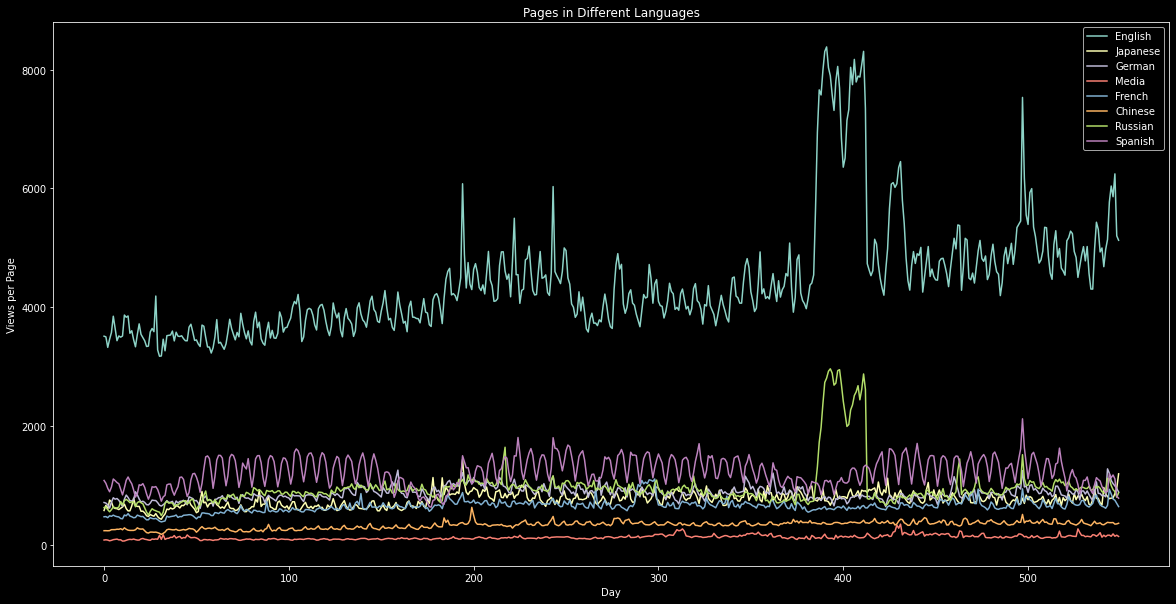

In [ ]:
# ▶ 국가별 일자에 따른 평균 트래픽 Polt

days = [r for r in range(sums['en'].shape[0])]

fig = plt.figure(1,figsize=[20,10])
plt.ylabel('Views per Page')
plt.xlabel('Day')
plt.title('Pages in Different Languages')
labels={'en':'English','ja':'Japanese','de':'German',
        'na':'Media','fr':'French','zh':'Chinese',
        'ru':'Russian','es':'Spanish'
       }

for key in sums:
    plt.plot(days,sums[key],label = labels[key] )

plt.legend()
plt.show()

### · 국가별 개별 Page 분석
---

In [ ]:
def plot_entry(key,idx):
    data = lang_sets[key].iloc[idx,1:]
    fig = plt.figure(1,figsize=(10,5))
    plt.plot(days,data,linestyle='-', color='lime')
    plt.xlabel('day')
    plt.ylabel('views')
    plt.title(df.iloc[lang_sets[key].index[idx],0])
    plt.show()

In [ ]:
lang_sets['en'].shape[0]

24108

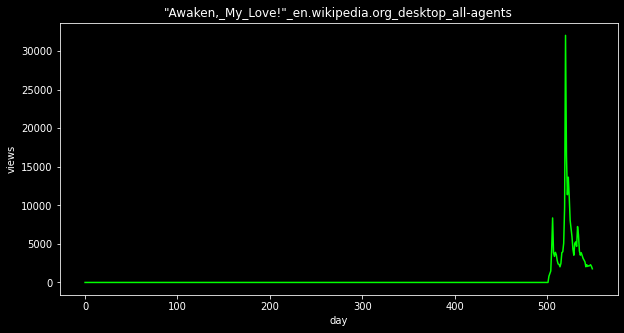

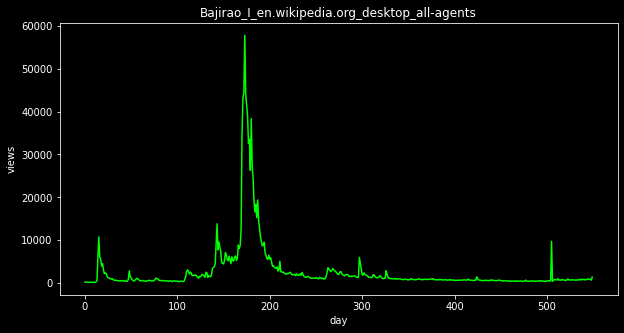

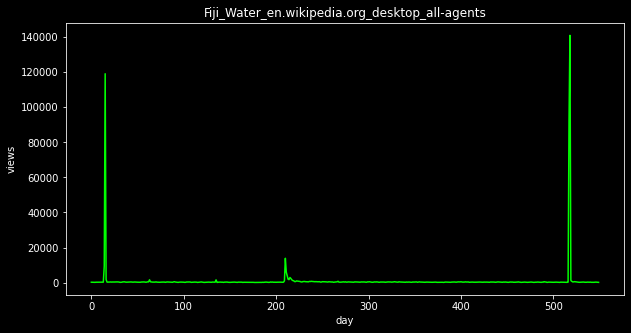

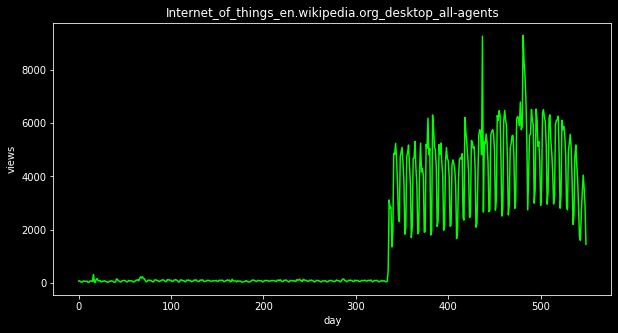

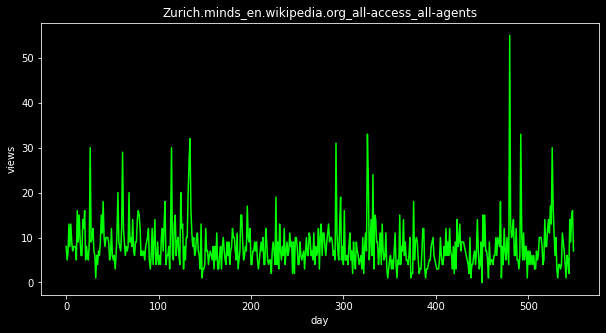

In [ ]:
idx = [1,250,750,1000,24107]
for i in idx:
    plot_entry('en',i)

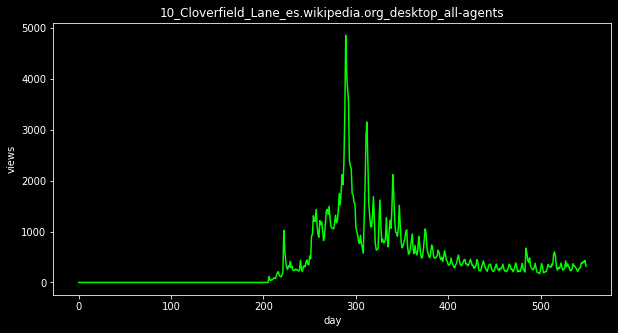

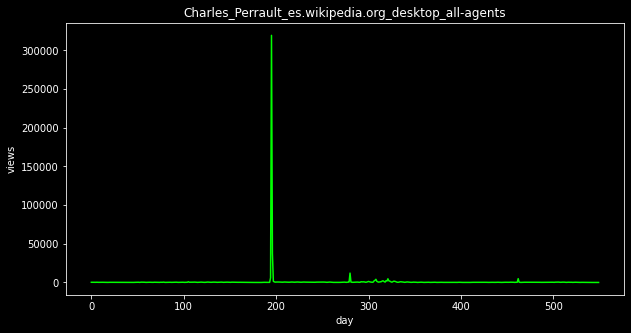

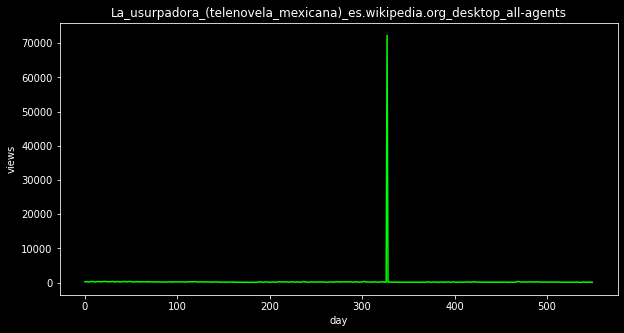

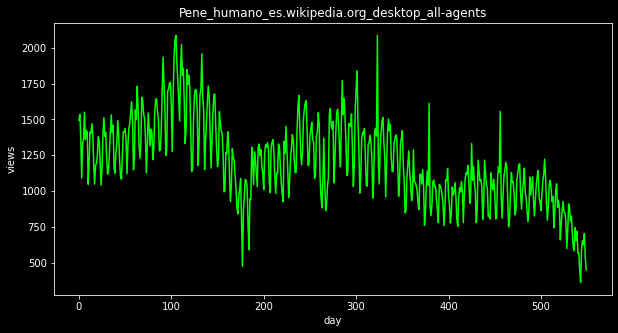

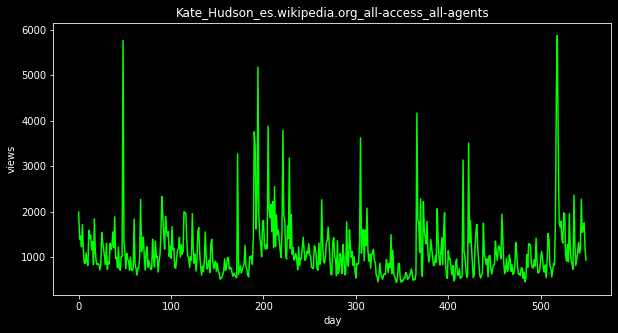

In [ ]:
idx = [1,250,750,1000,5000]
for i in idx:
    plot_entry('es',i)

### · 국가별 트래픽 Top5 추출
---

In [ ]:
# ▶ For each language get highest few pages
npages = 5
top_pages = {}
for key in lang_sets:
    print(key)
    sum_set = pd.DataFrame(lang_sets[key][['Page']])
    sum_set['total'] = lang_sets[key].sum(axis=1)
    sum_set = sum_set.sort_values('total',ascending=False)
    print(sum_set.head(npages))
    top_pages[key] = sum_set.index[0]
    print('\n\n')

en
                                                    Page         total
38573   Main_Page_en.wikipedia.org_all-access_all-agents  1.206618e+10
9774       Main_Page_en.wikipedia.org_desktop_all-agents  8.774497e+09
74114   Main_Page_en.wikipedia.org_mobile-web_all-agents  3.153985e+09
39180  Special:Search_en.wikipedia.org_all-access_all...  1.304079e+09
10403  Special:Search_en.wikipedia.org_desktop_all-ag...  1.011848e+09



ja
                                                 Page        total
120336  メインページ_ja.wikipedia.org_all-access_all-agents  210753795.0
86431      メインページ_ja.wikipedia.org_desktop_all-agents  134147415.0
123025   特別:検索_ja.wikipedia.org_all-access_all-agents   70316929.0
89202       特別:検索_ja.wikipedia.org_desktop_all-agents   69215206.0
57309   メインページ_ja.wikipedia.org_mobile-web_all-agents   66459122.0



de
                                                     Page         total
139119  Wikipedia:Hauptseite_de.wikipedia.org_all-acce...  1.603934e+09
116196  Wikip

## **🥇Session 3**  
**┗ 이상 탐지 모델링**  
---

### · Model Selection
---
* S-H_ESD Anomaly Detection
```
# Seasonal Hybrid ESD(S-H-ESD), Contextual Anomaly(시계열 동적 이상탐지)
# SNS 서비스(트위터)는 기존의 통계적 방법론들을 조합하여 시계열의 이상값을 탐지하는 방법을 제안
# 기존의 평균, 표준편차를 이용하는 방식은 Outlier를 포괄하여 계산하므로 이상값에 취약
# 평균과 표준편차가 seasonality, trend 등에 의해 변환되어 Outlier를 놓치게 되는 경우 발생
 🔻 핵심 개념 🔻
(1) Median Absolute Deviation(MAD): 관측값에서 중앙값을 뺀 값들의 중앙 값, 이상치에 덜 영향을 받는 robust한 분산 측정법
(2) ESD test(Grubb's test): 단일 이상치를 테스트 하는 통계적 방법, 평균에서 얼마나 멀어져있는지를 데이터의 분산과 대비하여 탐색
(3) Generalized ESD: ESD는 하나의 이상치만 발견, 여러개의 Outlier를 탐색, 계절성 고려 X
(4) STL: 시계열 데이터에서 계절성, 추세, 잔차 세가지 패턴요소로 분해하는 기법, 이상탐지에 적합한 residual만 고려
```
<img src = "https://drive.google.com/uc?id=16DJ_NbGq5vJNjj90ZAiR__t2rqthTnfb">
<img src = "https://drive.google.com/uc?id=181agHYMlTGbipqOIYa08iAZ908j-RTVL">



* 장단점
```
  # [good] 노이즈의 증가 (More noise)
  # [good] 급작스런 상승, 급등점 (Sudden grow; spike)
  # [good] 하강(Break down)
  # [good] 보이지 않던 희귀 값 (Activity when usually none)
  # [bad] 점진적 증가 신호(seasonal grow)
  # [bad] 평면적 신호 (Flat signal)
  # [bad] 점진적 증가하는 신호에서의 음의방향 이상치 (Negative seasonal anomaly)
```

### · Data 준비
---

In [ ]:
lang_sets.keys()

dict_keys(['en', 'ja', 'de', 'na', 'fr', 'zh', 'ru', 'es'])

In [ ]:
# ▶ For each language get highest few pages
npages = 5
top_pages = {}
key='en'

print(key)
sum_set = pd.DataFrame(lang_sets[key][['Page']])
sum_set['total'] = lang_sets[key].sum(axis=1)
sum_set = sum_set.sort_values('total',ascending=False)
print(sum_set.head(npages))
top_pages[key] = sum_set.index[0]
print('\n\n')

en
                                                    Page         total
38573   Main_Page_en.wikipedia.org_all-access_all-agents  1.206618e+10
9774       Main_Page_en.wikipedia.org_desktop_all-agents  8.774497e+09
74114   Main_Page_en.wikipedia.org_mobile-web_all-agents  3.153985e+09
39180  Special:Search_en.wikipedia.org_all-access_all...  1.304079e+09
10403  Special:Search_en.wikipedia.org_desktop_all-ag...  1.011848e+09





In [ ]:
top_pages

{'en': 38573,
 'ja': 120336,
 'de': 139119,
 'na': 45071,
 'fr': 27330,
 'zh': 28727,
 'ru': 99322,
 'es': 92205}

In [ ]:
# ▶ 트래픽 Top1 페이지 분석
idx = 38573

print(df.iloc[idx,0])
df.iloc[idx,1:]

Main_Page_en.wikipedia.org_all-access_all-agents


2015-07-01    20381245.0
2015-07-02    20752194.0
2015-07-03    19573967.0
2015-07-04    20439645.0
2015-07-05    20772109.0
                 ...    
2016-12-28    27025053.0
2016-12-29    26073819.0
2016-12-30    24363967.0
2016-12-31    26149541.0
lang                  en
Name: 38573, Length: 551, dtype: object

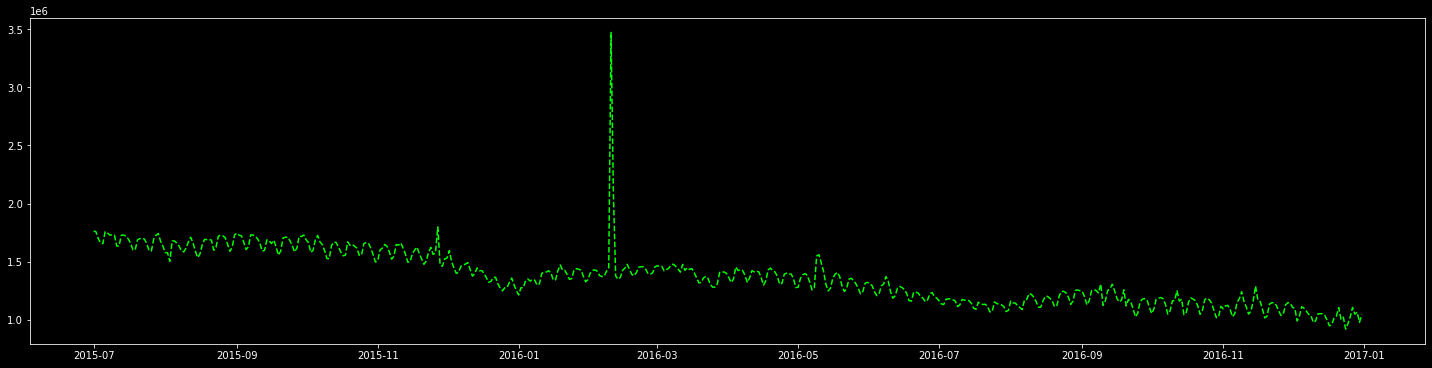

In [ ]:
idx = 92205

df_idx = df.iloc[idx,1:-1]
df_idx = df_idx.transpose()
df_idx.index = pd.to_datetime(df_idx.index)

plt.plot(df_idx, linestyle='--', color='lime');
plt.gcf().set_size_inches(25, 6)

### · S-H-ESD modeling
---

In [ ]:
# ▶ package 설치
!pip install pyculiarity

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 156 kB 37.1 MB/s 
  Created wheel for pyculiarity: filename=pyculiarity-0.0.7-py32-none-any.whl size=24797 sha256=c93768827cfdcba37ac25404b5142037cd02e75f81a1573971b9d9dd6b57764f
  Stored in directory: /root/.cache/pip/wheels/aa/90/d1/a074a0abc8689154b26b5d16249855293602afd0e8617c3cb6
Successfully built pyculiarity


In [ ]:
top_pages

{'en': 38573,
 'ja': 120336,
 'de': 139119,
 'na': 45071,
 'fr': 27330,
 'zh': 28727,
 'ru': 99322,
 'es': 92205}

In [ ]:
idx = 92205

df_idx = df.iloc[idx,1:-1]
df_idx = df_idx.transpose()
df_idx.index = pd.to_datetime(df_idx.index)

In [ ]:
df_idx.head()

2015-07-01    1764612.0
2015-07-02    1757734.0
2015-07-03    1700245.0
2015-07-04    1660195.0
2015-07-05    1655175.0
Name: 92205, dtype: object

In [ ]:
# ▶ date를 숫자형태(int64)로 변환
import numpy as np
df_idx = pd.DataFrame(df_idx).reset_index()
df_idx.columns = ['date', 'value']
df_idx['date'] = np.int64(df_idx['date'])
df_idx.head()

,date,value
0,1435708800000000000,1764612.0
1,1435795200000000000,1757734.0
2,1435881600000000000,1700245.0
3,1435968000000000000,1660195.0
4,1436054400000000000,1655175.0


In [ ]:
from pyculiarity import detect_ts
from pyculiarity.date_utils import date_format
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ▶ max_anoms: Maximum number of anomalies that S-H-ESD will detect as a percentage of the
# ▶ 참조 : https://github.com/zrnsm/pyculiarity/blob/master/pyculiarity/detect_ts.py
results = detect_ts(df_idx, max_anoms=0.20, direction='both')

In [ ]:
# ▶ """ Plotting """
# ▶ reformat the index and columns
timeS_DF = df_idx.set_index('timestamp')

anomsDF = results['anoms']
anomsDF.drop(['timestamp'], axis = 1, inplace = True)
anomsDF['is_anom'] = True
# anomsDF.columns = ['anom_value','is_anom']

merged_DF = pd.merge(left = timeS_DF, right= anomsDF, left_index=True, right_index=True, how = 'left')
# merged_DF.drop('anom_value',axis = 1,inplace=True)

print('>>> the number of anomaly: ', len(results['anoms']))
print(results['anoms'].head())

>>> the number of anomaly:  1
                         anoms  is_anom
timestamp                              
1455062400000000000  3471430.0     True


### · Model 평가
---

In [ ]:
merged_DF.head()

,value,anoms,is_anom
timestamp,,,
1435708800000000000,1764612.0,NaN,NaN
1435795200000000000,1757734.0,NaN,NaN
1435881600000000000,1700245.0,NaN,NaN
1435968000000000000,1660195.0,NaN,NaN
1436054400000000000,1655175.0,NaN,NaN


In [ ]:
# ▶ 시간 형태 변경, is_anom 필드 활용 Plot
merged_DF.index = pd.to_datetime(merged_DF.index)
merged_DF.head()

,value,anoms,is_anom
timestamp,,,
2015-07-01,1764612.0,NaN,NaN
2015-07-02,1757734.0,NaN,NaN
2015-07-03,1700245.0,NaN,NaN
2015-07-04,1660195.0,NaN,NaN
2015-07-05,1655175.0,NaN,NaN


In [ ]:
# ▶ 원본 데이터 시간 Type 변경
#idx = 120336

df_idx = df.iloc[idx,1:-1]
df_idx = df_idx.transpose()
df_idx.index = pd.to_datetime(df_idx.index)

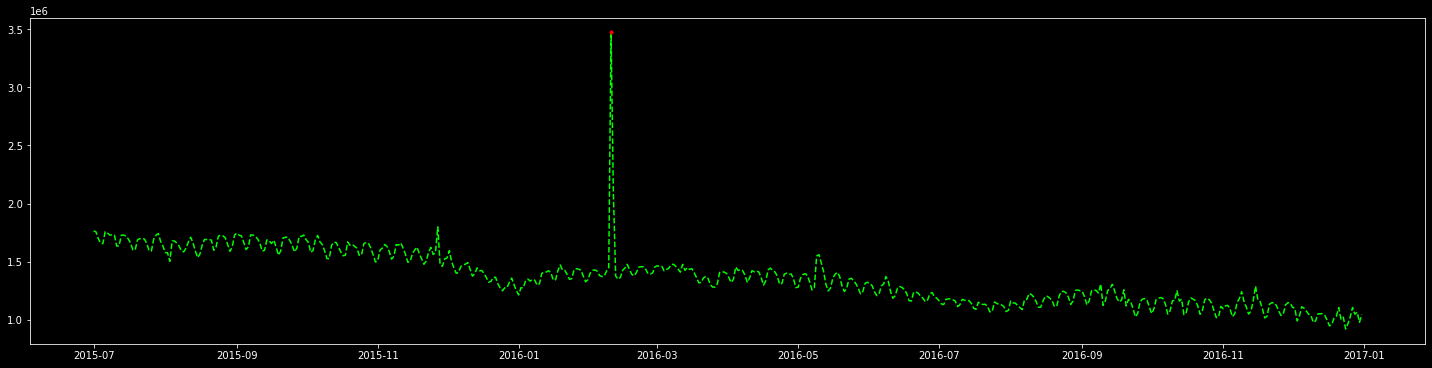

In [ ]:
plt.plot(df_idx, linestyle='--', color='lime');
plt.plot(merged_DF[merged_DF['is_anom']==True].index, merged_DF[merged_DF['is_anom']==True]['value'], 'o', color='red', markersize=3);
plt.gcf().set_size_inches(25, 6)